## Final Project Submission

Please fill out:
* Student name: Stephen Mwangi Thuo
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Project Overview
Performing Exploratory data analysis to generate actionable insights for Microsoft's new movie studio.


# Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# Data Understanding
To perform the analysis we have data from:
* Box Office Mojo website
* IMDBLinks website.
* Rotten Tomatoes website.
* TheMovieDB website.
* The Numbers website

In [1]:
import pandas as pd

In [6]:
# Loading the data
movie_title_basics = pd.read_csv("imdb.title.basics.csv.gz")
movie_title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')
movie_gross_revenue = pd.read_csv('bom.movie_gross.csv.gz')

In [7]:
# movie title dataset info
movie_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
# movie title rating info
movie_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
# movie_gross_revenue info
movie_gross_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


# Movie Title Basics Data

In [10]:
# previewing the first five records
movie_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
movie_title_basics['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

Note: The Movie_title_basics dataset contains movie titles from the year 2017 to 2115 with 2017 having highest number of movie start_year.

In [13]:
movie_title_basics['genres'].value_counts()

Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
                                 ...  
War,Western                          1
Action,Documentary,Western           1
Comedy,Documentary,Reality-TV        1
Adventure,Fantasy,War                1
Drama,Horror,War                     1
Name: genres, Length: 1085, dtype: int64

Note: There are 1085 genres with Documentary being the most common genre

# Movie Title Ratings Data

In [14]:
# previewing the first five records
movie_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


# Movie Gross Revenue Data

In [16]:
# previewing the first five records
movie_gross_revenue.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [356]:
# Film gross revenue period
movie_gross_revenue.year.value_counts()

2015    449
2016    433
2011    396
2012    393
2014    390
2013    345
2010    322
2017    320
2018    308
Name: year, dtype: int64

In [17]:
movie_gross_revenue['studio'].value_counts()

IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
GrtIndia        1
Libre           1
Grindstone      1
E1              1
B360            1
Name: studio, Length: 257, dtype: int64

Note: IFC has the most movie titles in the dataset.

# Data Preparation

## Data Cleaning

### Movie Title Basics
This dataset has:
* Missing values in columns: original_title,  runtime_minutes & genres.


In [24]:
# Dropping the original_title column.
# The primary_title is more relevant since it was used in publicity and marketing of the movies.
movie_title_basics.drop(columns = ['original_title'], inplace=True)

In [25]:
# preview after amputation
movie_title_basics.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [26]:
# Dropping rows with missing runtime and genres data
movie_title_basics = movie_title_basics.dropna()

In [27]:
movie_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112233 entries, 0 to 146139
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           112233 non-null  object 
 1   primary_title    112233 non-null  object 
 2   start_year       112233 non-null  int64  
 3   runtime_minutes  112233 non-null  float64
 4   genres           112233 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.1+ MB


### Movie Gross Revenue


#### Dealing with missing values
This Dataset has missing values in the foreign_gross column

In [28]:
movie_gross_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [57]:
# normalizing the foreign_gross column by removing commas.
movie_gross_revenue['foreign_gross'] = movie_gross_revenue['foreign_gross'].replace(',', '', regex=True)

In [58]:
# To avoid loosing close to 40% of the data, i will fill missing values with the median
movie_gross_revenue['foreign_gross'] = movie_gross_revenue['foreign_gross'].fillna(movie_gross_revenue['foreign_gross'].median())

In [60]:
# Droping the remaining missing values in the studio and domestic_gross columns
movie_gross_revenue.dropna(inplace=True)

In [61]:
movie_gross_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


#### Normalizing the data types

In [62]:
# Changing the data type to match the domestic_gross and foreign_gross
movie_gross_revenue['foreign_gross'] = movie_gross_revenue['foreign_gross'].astype(float)

In [63]:
movie_gross_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


# Merging The Datasets

## Movie Title Basics and Movie Title Rating

In [65]:
title_basics_and_rating = pd.merge(movie_title_basics, 
                                   movie_title_ratings,
                                   on=['tconst'],
                                  how='inner')

In [69]:
# preview of the merged dataset
title_basics_and_rating.head()

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [83]:
# save the cleaned merged movie_basics_and_rating dataset
title_basics_and_rating.to_csv('merged_title_rating_basics_df.csv')

## Movie Title Basics and Movie Gross Revenue

In [72]:
title_basics_and_grossing = pd.merge(movie_title_basics, 
                                   movie_gross_revenue,
                                   left_on=['primary_title'],
                                   right_on=['title'],
                                  how='inner')

In [75]:
title_basics_and_grossing.head()

,tconst,primary_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,18700000.0,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000.0,2012
2,tt2404548,On the Road,2011,90.0,Drama,On the Road,IFC,744000.0,8000000.0,2012
3,tt3872966,On the Road,2013,87.0,Documentary,On the Road,IFC,744000.0,8000000.0,2012
4,tt4339118,On the Road,2014,89.0,Drama,On the Road,IFC,744000.0,8000000.0,2012


# Feature Engineering
* Getting the Total Grossing of different movies in the title_basics_and_grossing merged dataset.

In [77]:
title_basics_and_grossing['Total_gross'] = (title_basics_and_grossing['domestic_gross'] + title_basics_and_grossing['foreign_gross'])

In [78]:
title_basics_and_grossing.head()

,tconst,primary_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,Total_gross
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,18700000.0,2016,19800000.0
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000.0,2012,8744000.0
2,tt2404548,On the Road,2011,90.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
3,tt3872966,On the Road,2013,87.0,Documentary,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
4,tt4339118,On the Road,2014,89.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8744000.0


In [84]:
# save the cleaned merged movie_basics_and_gross dataset
title_basics_and_grossing.to_csv('merged_title_basics_gross_df.csv')

# Analysis

In [279]:
import matplotlib.pyplot as plt
%matplotlib inline

## Top Rated Genres
### Genres with the highest average rating

#### Statistics and Distribution of Average Rating

In [161]:
title_basics_and_rating['averagerating'].describe()

count    65720.000000
mean         6.320902
std          1.458878
min          1.000000
25%          5.500000
50%          6.500000
75%          7.300000
max         10.000000
Name: averagerating, dtype: float64

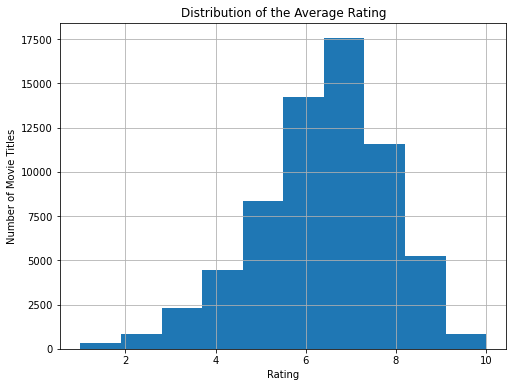

In [204]:
title_basics_and_rating['averagerating'].hist(figsize=[8,6])
plt.title("Distribution of the Average Rating")
plt.xlabel('Rating')
plt.ylabel('Number of Movie Titles')
plt.savefig('Distribution of the Average Rating'); 

#### Statistics and Distribution of Number of Votes

In [165]:
title_basics_and_rating['numvotes'].describe()

count    6.572000e+04
mean     3.954674e+03
std      3.208823e+04
min      5.000000e+00
25%      1.600000e+01
50%      6.200000e+01
75%      3.520000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

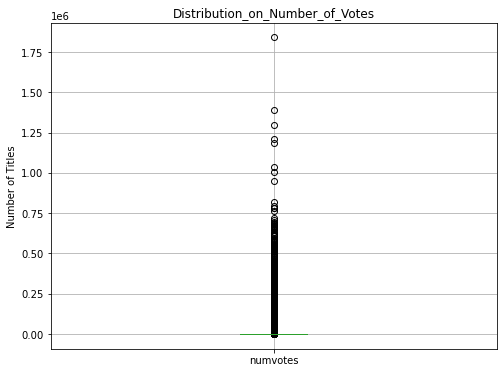

In [219]:
# A boxplot showing the spread of the number of votes
title_basics_and_rating.boxplot(column=['numvotes'], figsize=[8,6], meanline=True)
plt.title('Distribution_on_Number_of_Votes')
plt.ylabel('Number of Titles')
plt.savefig('Distribution_on_Number_of_Votes_boxplot.png');

In [201]:
# Normalizing the Data using min-max approach to determine the distribution

normalized_df=(title_basics_and_rating['numvotes']-title_basics_and_rating['numvotes'].min())/(title_basics_and_rating['numvotes'].max()-title_basics_and_rating['numvotes'].min())

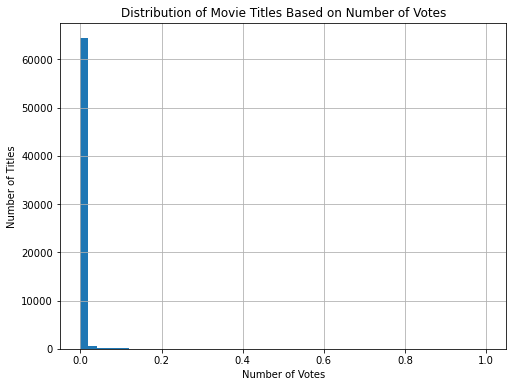

In [212]:
normalized_df.hist(figsize=[8,6], bins=50)
plt.title('Distribution of Movie Titles Based on Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Number of Titles')
plt.savefig('Distribution_on_Number_of_Votes.png'); 

Note: From the above Distribution more than 60,000 titles received between 5 and 184,111 votes (normalized to between 0 and 0.1). 

In [172]:
def how_popular(num_of_votes):
#     This function takes in number of votes and categories them into Not popular, Popular and Very Popular
    if num_of_votes < 1.600000e+01: # if num_of_votes is less than the 25th percentile returns Not Popular
        return 'Not Popular'
    elif num_of_votes > 3.520000e+02: # if num_of_votes is more than the 75th percentile returns Very Popular
        return 'Very Popular'
    else:
        return 'Popular' # if num_of_votes is between the 25th and the 75th percentile returns Popular

In [178]:
# Creating a new column showing how popular the title is based on the number of votes
title_basics_and_rating['popularity_of_title'] = title_basics_and_rating['numvotes'].apply(how_popular)
title_basics_and_rating['popularity_of_title'].head()

0         Popular
1         Popular
2    Very Popular
3         Popular
4         Popular
Name: popularity_of_title, dtype: object

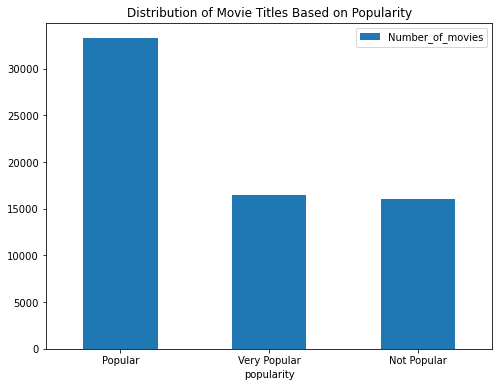

In [194]:
x = [x for x in title_basics_and_rating['popularity_of_title'].value_counts().index]
y = [y for y in title_basics_and_rating['popularity_of_title'].value_counts().values]

df = pd.DataFrame({'popularity':[x for x in title_basics_and_rating['popularity_of_title'].value_counts().index],
                   'Number_of_movies':[y for y in title_basics_and_rating['popularity_of_title'].value_counts().values]})
df.plot.bar(x='popularity', y='Number_of_movies', rot=0, figsize=[8,6])
plt.title('Distribution of Movie Titles Based on Popularity')
plt.savefig('Distribution_on_popularity.png'); 

Note: From the above Distribution above 30,000 movie titles received votes between the 25th and the 75th percentiles.

In [94]:
# grouping the title_basics_and_rating dataset by genre
highest_avg_rating = title_basics_and_rating.groupby(['genres'])['averagerating', 
                                            'numvotes'].mean().sort_values(['averagerating'], 
                                                                           ascending=False)

<ipython-input-94-57c8799355d6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  highest_avg_rating = title_basics_and_rating.groupby(['genres'])['averagerating',


#### Relationship between highly rated genres and the Number of Votes

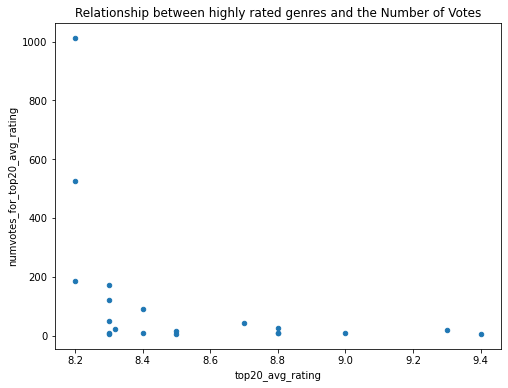

In [358]:
# Initializing empty lists to store 20 genres with highest average rating
top20_avg_rating = []
top20_genres = []
numvotes_for_top20_avg_rating = []

# Using for loops to create lists of indexes and values for plotting
for index in highest_avg_rating[:20].index:
    top20_genres.append(index)

for avg, num in highest_avg_rating[:20].values:
    top20_avg_rating.append(avg)
    numvotes_for_top20_avg_rating.append(num)
    
# putting the lists into a dataframe 

df = pd.DataFrame({'top20_avg_rating': top20_avg_rating,
                   'numvotes_for_top20_avg_rating': numvotes_for_top20_avg_rating}, 
                  index=top20_genres)

# Plotting a scatter plot showing the relationship between highly rated genres and the number of votes

df.plot.scatter(x='top20_avg_rating', 
                y='numvotes_for_top20_avg_rating', figsize=[8,6],
            title='Relationship between highly rated genres and the Number of Votes'); 
plt.savefig('Rating_VS_Number_of_Votes.png')            

Note: From the above Scatter plot, the top 20 genres with the higest average rating have less than 1200 votes. With 90% having below 200 votes. This indicates that the average rating is not a good indicator of the genres' popularity. 

In [140]:
genres_by_num_of_votes = title_basics_and_rating.groupby(['genres'])['averagerating',
                                                                     'numvotes'].mean().sort_values(['numvotes'],
                                                                                                    ascending=False)

<ipython-input-140-0074399d74a2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genres_by_num_of_votes = title_basics_and_rating.groupby(['genres'])['averagerating',


In [142]:
genres_by_num_of_votes[:10]

,averagerating,numvotes
genres,,
"Action,Fantasy,War",6.200000,262978.000000
"Action,Adventure,Sci-Fi",5.668293,187179.292683
"Adventure,Mystery,Sci-Fi",5.075000,135042.500000
"Adventure,Drama,Sci-Fi",6.170000,99316.950000
"Action,Adventure,Fantasy",5.336000,96588.050000
"Biography,Drama,Thriller",6.685714,88518.904762
"Action,Adventure,Thriller",5.547826,81476.152174
"Action,Adventure,Mystery",5.233333,80838.111111
"Action,Crime,Sci-Fi",5.875000,78214.125000


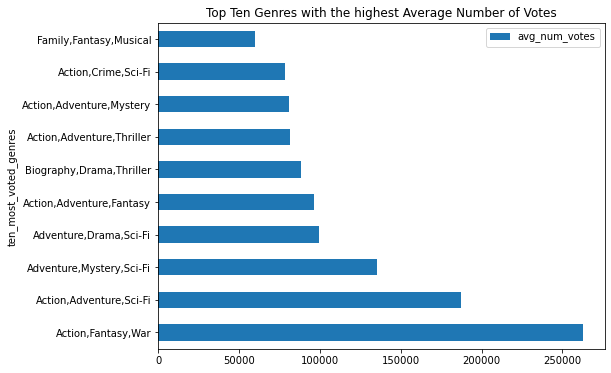

In [157]:
# Initializing empty lists to store 20 genres with highest average rating
avg_num_votes = []
ten_most_voted_genres = []

# Using for loops to create lists of indexes and values for plotting
for index in genres_by_num_of_votes[:10].index:
    ten_most_voted_genres.append(index)

for avg, num in genres_by_num_of_votes[:10].values:
    avg_num_votes.append(num)
    
# putting the lists into a dataframe 

df = pd.DataFrame({'ten_most_voted_genres': ten_most_voted_genres,
                   'avg_num_votes': avg_num_votes})

# Plotting a scatter plot showing the relationship between highly rated genres and the number of votes

df.plot.barh(x='ten_most_voted_genres', 
                y='avg_num_votes', figsize=[8,6],
            title='Top Ten Genres with the highest Average Number of Votes'); 
plt.savefig('Top_Ten_Rated_Genres.png') 

Note: From the top ten rated Genres combinations with; Action, Fantasy, Adventure and Sci-Fi received the most number of votes. This indicates that they have a comparatively larger fun base.

## Genres  and Total Grossing
### Genres with the Highest Gross Revenue

In [220]:
title_basics_and_grossing.head()

,tconst,primary_title,start_year,runtime_minutes,genres,title,studio,domestic_gross,foreign_gross,year,Total_gross
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",Wazir,Relbig.,1100000.0,18700000.0,2016,19800000.0
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,IFC,744000.0,8000000.0,2012,8744000.0
2,tt2404548,On the Road,2011,90.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
3,tt3872966,On the Road,2013,87.0,Documentary,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
4,tt4339118,On the Road,2014,89.0,Drama,On the Road,IFC,744000.0,8000000.0,2012,8744000.0


In [345]:
# Grouping the total gross by genres
genres_by_total_gross = title_basics_and_grossing.groupby(['genres'])['Total_gross',
                                                                    ].sum().sort_values(['Total_gross'],
                                                                                                    ascending=False)
genres_by_total_gross.head()

,Total_gross
genres,
"Adventure,Animation,Comedy","27,663,432,597.000"
"Action,Adventure,Sci-Fi","27,654,802,387.900"
"Action,Adventure,Fantasy","13,314,887,000.000"
Drama,"10,423,290,296.000"
"Action,Adventure,Comedy","9,797,572,299.000"


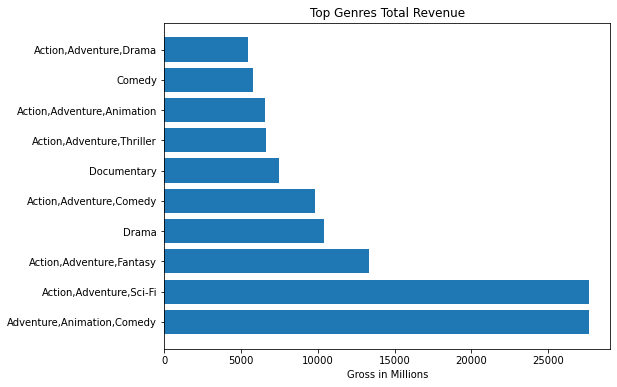

In [359]:
# lists to store 10 genres with highest total gross with revenue in millions
total_genre_grossing = [int(num/1000000) for num in genres_by_total_gross[:10].values]
top_grossing_genres = [genre for genre in genres_by_total_gross[:10].index]
     
# Plotting a scatter plot showing the relationship between highly rated genres and the number of votes
plt.figure(figsize=[8,6])

plt.barh( top_grossing_genres,
                total_genre_grossing)
plt.xlabel('Gross in Millions')
plt.title('Top Genres Total Revenue');
plt.savefig('Top_Ten_Grossing_Genres.png') 

A combination of Comedy, Sci-Fi, Thriller and Animation with Adventure and Action grossed the highest.

## Top Studios in Revenue Gross and Genres
### Top Studios in Revenue

In [314]:
# Grouping studios with their focus genres
studios_by_revenue = title_basics_and_grossing.groupby(['studio'])['Total_gross',
                                                                    ].sum().sort_values(['Total_gross','studio'],
                                                                                                    ascending=False)

In [315]:
studios_by_revenue

,Total_gross
studio,
BV,"43,153,949,368.500"
Uni.,"33,573,469,191.400"
Fox,"31,348,666,597.000"
WB,"26,313,202,998.000"
Sony,"18,664,157,497.000"
...,...
MPFT,"205,000.000"
FOAK,"124,300.000"
First,"55,600.000"


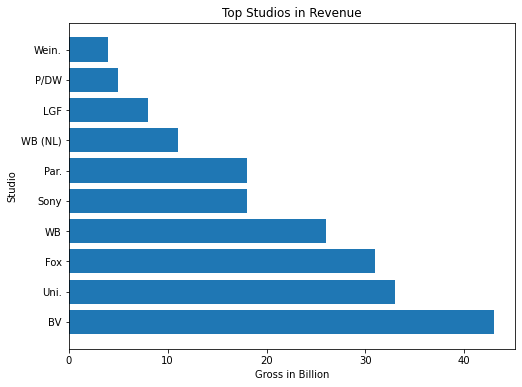

In [361]:
# lists to store 10 Studios with highest total gross with revenue in billions
total_studio_grossing = [int(num/1000000000) for num in studios_by_revenue[:10].values]
top_grossing_studios = [studio for studio in studios_by_revenue[:10].index]
     
# Plotting a scatter plot showing the relationship between highly rated genres and the number of votes
plt.figure(figsize=[8,6])

plt.barh( top_grossing_studios,
                total_studio_grossing)
plt.xlabel('Gross in Billion')
plt.ylabel('Studio')
plt.title('Top Studios in Revenue');
plt.savefig('Top_Ten_Grossing_Studios.png') 

# Conclusions

This analysis lead to three recommendations for a successful movie studio:
Microsoft should focus on genre combinations with; Action, Fantasy, Adventure and Sci-Fi. The analysis show that these genres have have a comparatively larger fun base which increases the chances of the movies success.
In terms of revenue, Microsoft should focus on combining Action, Adventure genres which from analysis show a higher grossing. 

# Next step

Further analysis and benchmark on the top earnig studios would give more information on their different combination of genres that translates to higher grossing.